In [36]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras

from tensorflow.keras.utils import to_categorical

In [37]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()

print('Training data shape: ', train_x.shape, train_y.shape)
print('Testing data shape: ', test_x.shape, test_y.shape)  # shape = (W * H * Depth)

Training data shape:  (60000, 28, 28) (60000,)
Testing data shape:  (10000, 28, 28) (10000,)


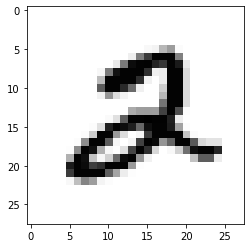

In [38]:
plt.imshow(train_x[5,:,:], cmap="Greys")  # cmap = virdis

In [39]:
train_y[:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [40]:
# Find the unique numbers from the train labels
classes = np.unique(train_y)
classes_num = len(classes)
print('Total number of outputs: ', classes_num)
print('Output classes: ', classes)

Total number of outputs:  10
Output classes:  [0 1 2 3 4 5 6 7 8 9]


(-0.5, 27.5, 27.5, -0.5)

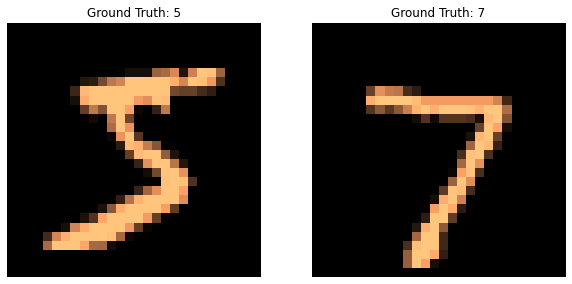

In [41]:
plt.figure(figsize=[10,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_x[0,:,:], cmap='copper')
plt.title("Ground Truth: {}".format(train_y[0]))
plt.axis("off")

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_x[0,:,:], cmap='copper')
plt.title("Ground Truth: {}".format(test_y[0]))
plt.axis("off")

### 2. Preprocessing

In [42]:
# Change from matrix to array of dimension 28x28 to array of dimension 784

train_x = train_x.reshape(train_x.shape[0], -1)
test_x = test_x.reshape(test_x.shape[0], -1)

print(train_x[0].shape)

(784,)


In [43]:
# 0-255 to 0-1
train_x = train_x/255
test_x = test_x/255

# Change the labels from integer to categorical data
train_y_one_hot = keras.utils.to_categorical(train_y)
test_y_one_hot = keras.utils.to_categorical(test_y) 

In [44]:
train_y.shape, train_y_one_hot.shape

((60000,), (60000, 10))

In [45]:
import pandas as pd

pd.DataFrame(train_y_one_hot, columns=[f"C{i}" for i in classes]).head(n=15)

,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### 3. Model Configuration

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [47]:
model = Sequential()

# Input layyer
model.add(Dense(512, activation='relu', input_shape=(train_x.shape[1],)))

# Midden layer(s)
model.add(Dense(512, activation='relu'))

# Output layer
model.add(Dense(classes_num, activation='softmax'))

# Model parameters
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Model training

# Function/Perceptron: predicts binary class: win or lose
# x1: current standings/rank: 1 ... 50
# x2: time of day: 6-21

# Dataset (0: 100, 2,1): 100(number of games), 2 (x1, x2), 1 {win, lose}
# Input 1: D[0,:,0] -> 0

# Epochs: Invloves seeing all images in the training data during one cycle
# Interations: Updates made to network weights based on single or multiple images (batch size)
history = model.fit(train_x, train_y_one_hot,
                   batch_size=256, epochs=10, verbose=True,
                   validation_data=(test_x, test_y_one_hot))

[test_loss, test_acc] = model.evaluate(test_x, test_y_one_hot)
print(f"Evaluation result on Test Data : Loss = {test_loss}, accuracy = {test_acc}")



Epoch 1/10
235/235 [==============================] - 3s 13ms/step - loss: 0.2704 - accuracy: 0.9149 - val_loss: 0.1195 - val_accuracy: 0.9610
Epoch 2/10
235/235 [==============================] - 3s 12ms/step - loss: 0.0938 - accuracy: 0.9711 - val_loss: 0.0870 - val_accuracy: 0.9716
Epoch 3/10
235/235 [==============================] - 3s 12ms/step - loss: 0.0597 - accuracy: 0.9811 - val_loss: 0.0705 - val_accuracy: 0.9773
Epoch 4/10
235/235 [==============================] - 3s 12ms/step - loss: 0.0401 - accuracy: 0.9871 - val_loss: 0.1055 - val_accuracy: 0.9667
Epoch 5/10
235/235 [==============================] - 3s 12ms/step - loss: 0.0294 - accuracy: 0.9908 - val_loss: 0.0892 - val_accuracy: 0.9766
Epoch 6/10
235/235 [==============================] - 3s 12ms/step - loss: 0.0224 - accuracy: 0.9924 - val_loss: 0.0881 - val_accuracy: 0.9780
Epoch 7/10
235/235 [==============================] - 3s 12ms/step - loss: 0.0177 - accuracy: 0.9945 - val_loss: 0.0678 - val_accuracy: 0.9824

In [48]:
import tensorflow as tf

# MLP Model Architecture (MLP - Multilayer perception)
model = Sequential()

# Input layyer
model.add(tf.keras.Input(shape=(train_x.shape[1])))

# Midden layer(s)
model.add(Dense(512, activation='relu'))

# Output layer
model.add(Dense(classes_num, activation='softmax'))

# Model parameters
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Model training

# Function/Perceptron: predicts binary class: win or lose
# x1: current standings/rank: 1 ... 50
# x2: time of day: 6-21

# Dataset (0: 100, 2,1): 100(number of games), 2 (x1, x2), 1 {win, lose}
# Input 1: D[0,:,0] -> 0

# Epochs: Invloves seeing all images in the training data during one cycle
# Interations: Updates made to network weights based on single or multiple images (batch size)
history = model.fit(train_x, train_y_one_hot,
                   batch_size=256, epochs=10, verbose=True,
                   validation_data=(test_x, test_y_one_hot))

[test_loss, test_acc] = model.evaluate(test_x, test_y_one_hot)
print(f"Evaluation result on Test Data : Loss = {test_loss}, accuracy = {test_acc}")

Epoch 1/10
235/235 [==============================] - 3s 11ms/step - loss: 0.3108 - accuracy: 0.9109 - val_loss: 0.1767 - val_accuracy: 0.9457
Epoch 2/10
235/235 [==============================] - 2s 9ms/step - loss: 0.1291 - accuracy: 0.9626 - val_loss: 0.1140 - val_accuracy: 0.9637
Epoch 3/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0851 - accuracy: 0.9749 - val_loss: 0.0915 - val_accuracy: 0.9716
Epoch 4/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0614 - accuracy: 0.9820 - val_loss: 0.0749 - val_accuracy: 0.9768
Epoch 5/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0477 - accuracy: 0.9861 - val_loss: 0.0673 - val_accuracy: 0.9798
Epoch 6/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0366 - accuracy: 0.9890 - val_loss: 0.0814 - val_accuracy: 0.9756
Epoch 7/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0287 - accuracy: 0.9917 - val_loss: 0.0687 - val_accuracy: 0.9794
Epoch

### 4. Visualize Learning results

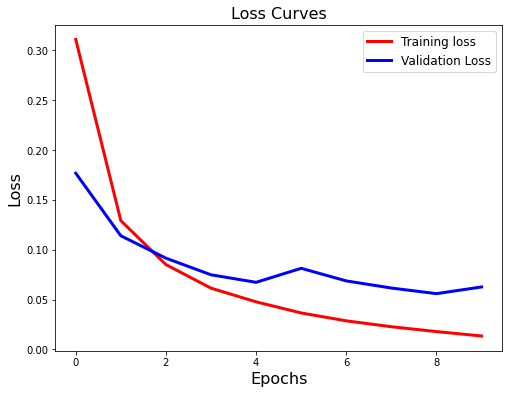

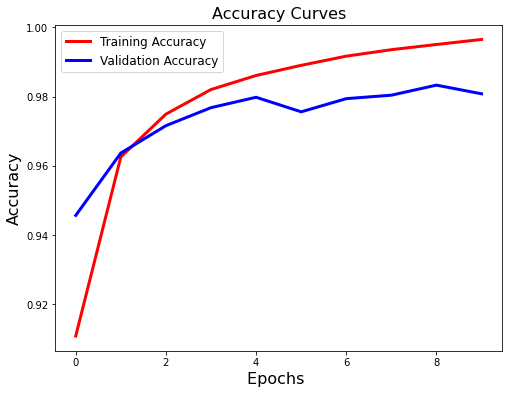

In [49]:
def plot_history(history):
    # Plot the Loss Curves
    plt.figure(figsize=[8,6])
    
    plt.plot(history.history['loss'], 'r', linewidth=3.0)
    plt.plot(history.history['val_loss'], 'b', linewidth=3.0)
    
    plt.legend(['Training loss', 'Validation Loss'], fontsize=12)
    plt.xlabel('Epochs', fontsize=16)
    plt.ylabel('Loss', fontsize=16)
    plt.title('Loss Curves', fontsize=16)
    
    # Plot the Accuracy Curves
    plt.figure(figsize=[8,6])
    
    plt.plot(history.history['accuracy'], 'r', linewidth=3.0)    
    plt.plot(history.history['val_accuracy'], 'b', linewidth=3.0)
    
    plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=12)
    plt.xlabel('Epochs ', fontsize=16)
    plt.ylabel('Accuracy', fontsize=16)
    plt.title('Accuracy Curves', fontsize=16)
    
plot_history(history)

Lightweight CNN example

In [50]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [51]:
# Define your architecture
model = keras.Sequential()

# Input layer 
model.add(tf.keras.Input(shape=(28, 28, 1)))

# Hiffen layer
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(Flatten())

# Outout layer
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 flatten_2 (Flatten)         (None, 21632)             0         
                                                                 
 dense_18 (Dense)            (None, 10)                216330    
                                                                 
Total params: 216,650
Trainable params: 216,650
Non-trainable params: 0
_________________________________________________________________


In [52]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()

# Change the labels from integer to categorical data
train_y_one_hot = keras.utils.to_categorical(train_y)
test_y_one_hot = keras.utils.to_categorical(test_y)

In [53]:
# compile model
opt = keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# # fit model
history = model.fit(train_x, train_y_one_hot, epochs=30, batch_size=64, validation_data=(test_x, test_y_one_hot), verbose=1)

Epoch 1/30


c:\Users\merli\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


938/938 [==============================] - 11s 12ms/step - loss: 15.2443 - accuracy: 0.3517 - val_loss: 0.7670 - val_accuracy: 0.7602
Epoch 2/30
938/938 [==============================] - 12s 13ms/step - loss: 0.5859 - accuracy: 0.8108 - val_loss: 0.4235 - val_accuracy: 0.8688
Epoch 3/30
938/938 [==============================] - 11s 12ms/step - loss: 0.3198 - accuracy: 0.8992 - val_loss: 0.2755 - val_accuracy: 0.9188
Epoch 4/30
938/938 [==============================] - 12s 13ms/step - loss: 0.2368 - accuracy: 0.9259 - val_loss: 0.2601 - val_accuracy: 0.9261
Epoch 5/30
938/938 [==============================] - 13s 14ms/step - loss: 0.2040 - accuracy: 0.9365 - val_loss: 0.2329 - val_accuracy: 0.9310
Epoch 6/30
938/938 [==============================] - 12s 13ms/step - loss: 0.1862 - accuracy: 0.9421 - val_loss: 0.2256 - val_accuracy: 0.9343
Epoch 7/30
938/938 [==============================] - 12s 12ms/step - loss: 0.1742 - accuracy: 0.9449 - val_loss: 0.2477 - val_accuracy: 0.9303
Ep

In [54]:
[test_loss, test_acc] = model.evaluate(test_x, test_y_one_hot)
print(f"Evaluate result on Test Data: Loss = {test_loss}, accuracy = {test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 0.2892 - accuracy: 0.9280
Evaluate result on Test Data: Loss = 0.28922799229621887, accuracy = 0.9279999732971191
